In [109]:
# Import all the necessary files!
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [81]:
train_df = pd.read_csv("../mnist/input/sign_mnist_train.csv")
test_df = pd.read_csv("../mnist/input/sign_mnist_test.csv")

# Data Exploration & Visualization

In [72]:
print(train_df.shape)
print(test_df.shape)

(27455, 785)
(7172, 785)


In [73]:
# see the labels: 0-24
labels = train_df['label'].values
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

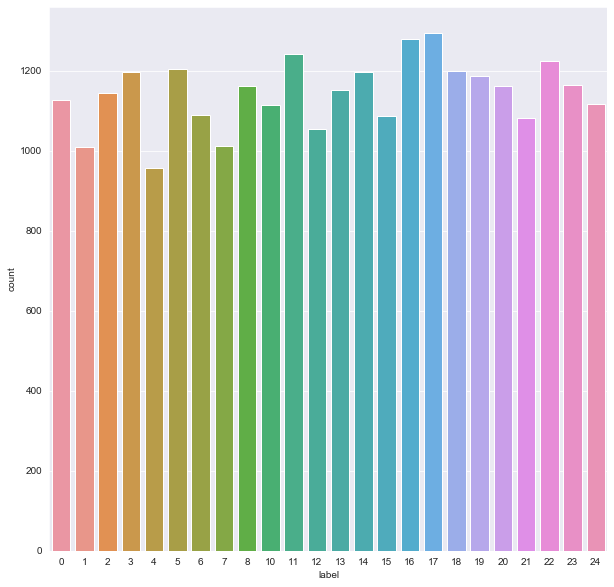

In [74]:
# see the count of 25 lables, and they are balanced
plt.figure(figsize = (10,10)) # Label Count
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

In [82]:
# creating x and y variables for training and testing
y_train = train_df['label']
y_test = test_df['label']
print(train_df.shape)
print(y_train.shape)
print(test_df.shape)
print(y_test.shape)

(27455, 785)
(27455,)
(7172, 785)
(7172,)


In [105]:
del train_df['label']
del test_df['label']

In [87]:
# transform the labels to binary
testing_labels = to_categorical(y_test)
training_labels = to_categorical(y_train)

In [106]:
# Normalizing the training and test data
#Reshaping the data from 1-D to 3-D as required through input by CNN's
train = train_df.values/ 255
test = test_df.values / 255
training_image = train.reshape(train.shape[0], 28, 28, 1)
testing_image = test.reshape(test.shape[0], 28, 28, 1)

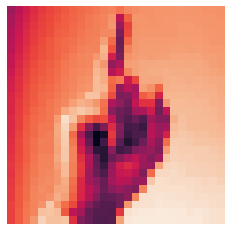

In [107]:
# reshape to 28*28 and show the image, Image d
images = np.array([np.reshape(i, (28, 28)) for i in train_df.values])
fig, ax = plt.subplots()
im = ax.imshow(images[0])
ax.axis('off')
plt.show()

# Image Augmentation 

In [114]:
# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(rotation_range = 10,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.1,
                                   horizontal_flip = False,
                                   vertical_flip=False
    )

train_datagen.fit(training_image)

# validation image not augmented 
print(training_image.shape)
    

(27455, 28, 28, 1)


In [118]:
# Define a Callback class that stops training once accuracy reaches 90.0%
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >0.97):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True


# Model

In [129]:
# Define the model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(75, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(50, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(25, activation='softmax')]
    )

# Compile Model. 
model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_generator = train_datagen.flow(training_image,training_labels)

# Train the Model
history = model.fit_generator(train_generator,
                    epochs=20, 
                    validation_data = (testing_image, testing_labels),
                     callbacks = [myCallback()])



model.evaluate(testing_image, testing_labels, verbose=10)

Epoch 1/20
858/858 [==============================] - 48s 56ms/step - loss: 3.1758 - accuracy: 0.0530 - val_loss: 3.1489 - val_accuracy: 0.0364
Epoch 2/20
858/858 [==============================] - 44s 51ms/step - loss: 3.0544 - accuracy: 0.1073 - val_loss: 2.7860 - val_accuracy: 0.1803
Epoch 3/20
858/858 [==============================] - 54s 62ms/step - loss: 2.8292 - accuracy: 0.1679 - val_loss: 2.4485 - val_accuracy: 0.2423
Epoch 4/20
858/858 [==============================] - 51s 60ms/step - loss: 2.6006 - accuracy: 0.2304 - val_loss: 2.1050 - val_accuracy: 0.4126
Epoch 5/20
858/858 [==============================] - 58s 68ms/step - loss: 2.3175 - accuracy: 0.3073 - val_loss: 1.7480 - val_accuracy: 0.4848
Epoch 6/20
858/858 [==============================] - 51s 60ms/step - loss: 1.9512 - accuracy: 0.4083 - val_loss: 1.2910 - val_accuracy: 0.6210
Epoch 7/20
858/858 [==============================] - 64s 75ms/step - loss: 1.5995 - accuracy: 0.5074 - val_loss: 1.2686 - val_accuracy:

[0.13069841265678406, 0.96026211977005]

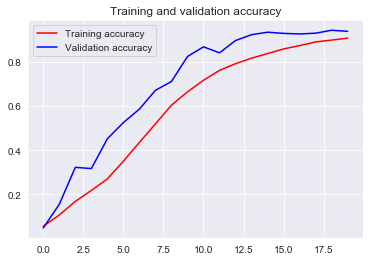

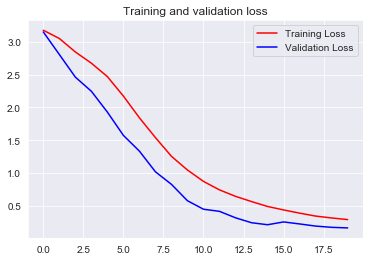

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
acc =  history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [125]:
y_pred = model.predict(testing_image)

In [126]:
from sklearn.metrics import accuracy_score
accuracy_score(testing_labels, y_pred.round())

0.9291689905186837